## Polynomial Regression


In [1]:
#Step 1: importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures  

In [2]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42) 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [3]:
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [4]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [5]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [6]:
#Step 5:Get the values of slope (m) and intercept (c) from the trained model
m=model.coef_[0]
print("Slope (m):", m)
c=model.intercept_
print("Intercept (c):", model.intercept_)

Slope (m): 0.0
Intercept (c): 25.834848216909293


In [7]:
#Step 6:Display the equation of the line
print(f"Equation of the line: Y={m:.2f}X+{c:.2f}")

Equation of the line: Y=0.00X+25.83


In [9]:
#Step 7:Predict values using the model
Y_pred=model.predict(X_poly)

In [10]:
mse=mean_squared_error(Y,Y_pred)
print(f"Mean squared error:{mse:.4f}")

Mean squared error:11.4742


In [11]:
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute error:{mae:.4f}")

Mean Absolute error:2.9843


In [12]:
rmse=np.sqrt(mse)
print(f"Root Mean Squared error(RMSE):{rmse:.4f}")

Root Mean Squared error(RMSE):3.3874


In [13]:
r2=r2_score(Y,Y_pred)
print(f"R-Squared (R2):{r2:.4f}")

R-Squared (R2):0.9467


In [14]:
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-Squared:{adj_r2:.4f}")

Adjusted R-Squared:0.9400


In [15]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        13:25:59   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


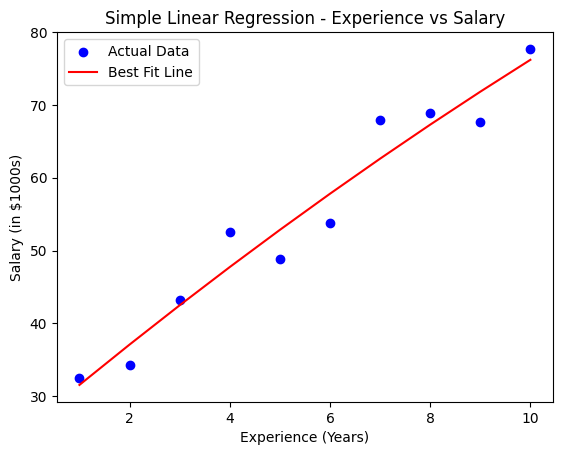

In [16]:
#Step 8:Plot the actual data points
plt.scatter(X, Y, color='blue', label='Actual Data')
# Step 9: Plot the Regression Line (Best Fit Line)
plt.plot(X, Y_pred, color='red', label='Best Fit Line')
# Step 10: Add labels and legend
plt.xlabel('Experience (Years)')  # Fixed typo here
plt.ylabel('Salary (in $1000s)')  
plt.title('Simple Linear Regression - Experience vs Salary')
plt.legend()
# Step 11: Display the graph
plt.show()